In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-10-26 16:42:39--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  1.20MB/s    in 2.7s    

2023-10-26 16:42:43 (1.20 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.4 MB/s eta 0:00:00


In [3]:
from transformers import pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import textwrap

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [4]:
clf = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
clf(
    "This is a great movie",
    candidate_labels=["positive", "negative"]
)


{'sequence': 'This is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9969461560249329, 0.0030538293067365885]}

In [6]:
# https://en.wikipedia.org/wiki/AMP-activated_protein_kinase
text = \
"Due to the presence of isoforms of its components, there are 12 versions " + \
"of AMPK in mammals, each of which can have different tissue " + \
"localizations, and different functions under different conditions. " + \
"AMPK is regulated allosterically and by post-translational " + \
"modification, which work together."
clf(
    text,
    candidate_labels=["biology", "math", "geology"]
)

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions. AMPK is regulated allosterically and by post-translational modification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8908604383468628, 0.06606573611497879, 0.0430738590657711]}

In [8]:
df = pd.read_csv("AirlineTweets.csv")

In [9]:
len(df)

14640

In [10]:
df.sample(frac=1).head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
10497,569248700947689474,negative,1.0,Late Flight,0.6559,US Airways,NaN,SSGV,NaN,0,"@USAirways, another hour gone &amp; they sit w...",NaN,2015-02-21 13:34:01 -0800,"Kokomo, IN",NaN
6516,567805887319912448,positive,1.0,NaN,NaN,Southwest,NaN,DascenzoFan,NaN,0,@SouthwestAir Awwweesssooomee!,NaN,2015-02-17 14:00:47 -0800,"Tucson, AZ",Arizona
693,570179158594220032,negative,1.0,Can't Tell,1.0000,United,NaN,inspirevery,NaN,0,@united maybe one day you'll be the one quoted...,NaN,2015-02-24 03:11:19 -0800,NaN,NaN
673,570204730745421826,negative,1.0,Flight Attendant Complaints,1.0000,United,NaN,Evan_Flay,NaN,0,@united are the ones who make it difficult for...,"[29.98698389, -90.25081767]",2015-02-24 04:52:56 -0800,Seattle,Pacific Time (US & Canada)
3674,568191654986792960,positive,1.0,NaN,NaN,United,NaN,parryaftab,NaN,0,@united @parryaftab done thnx,NaN,2015-02-18 15:33:41 -0800,NaN,Central Time (US & Canada)


In [12]:
labels = list(set(df.airline_sentiment))
labels

['negative', 'neutral', 'positive']

In [13]:
print(textwrap.fill(df.iloc[1024]['text']))

@united We've had a ton of problems with getting our bags and have
been given the run around for a day. Whats up with that?


In [15]:
df.iloc[1024]['airline_sentiment']

'negative'

In [16]:
clf(df.iloc[1024]['text'], candidate_labels=labels)

{'sequence': "@united We've had a ton of problems with getting our bags and have been given the run around for a day. Whats up with that?",
 'labels': ['negative', 'neutral', 'positive'],
 'scores': [0.9672361612319946, 0.02322990633547306, 0.009533901698887348]}

In [17]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [18]:
df_ = df[:100]

In [19]:
preds = clf(df_.text.tolist(), candidate_labels=labels)

In [20]:
labels = list(set(df_.airline_sentiment))
labels

['negative', 'neutral', 'positive']

In [21]:
predicted_labels = [d['labels'][0] for d in preds]

In [22]:
df_['predicted_labels'] = predicted_labels

<ipython-input-22-b4a52528a5d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['predicted_labels'] = predicted_labels


In [24]:
print("Acc.:", np.mean(df_['predicted_labels'] == df_['airline_sentiment']))

Acc.: 0.54


In [25]:
# Convert predicion probs into an NxK matrix according to
# original label order

N = len(df_)
K = len(labels)
label2idx = {v:k for k,v in enumerate(labels)}

probs = np.zeros((N, K))
for i in range(N):
    # loop through labels and scores in corresponding order
    d = preds[i]
    for label, score in zip(d['labels'], d['scores']):
        k = label2idx[label]
        probs[i, k] = score


In [27]:
int_labels = [label2idx[x] for x in df_['airline_sentiment']]

In [28]:
int_preds = np.argmax(probs, axis=1)
cm = confusion_matrix(int_labels, int_preds, normalize='true')


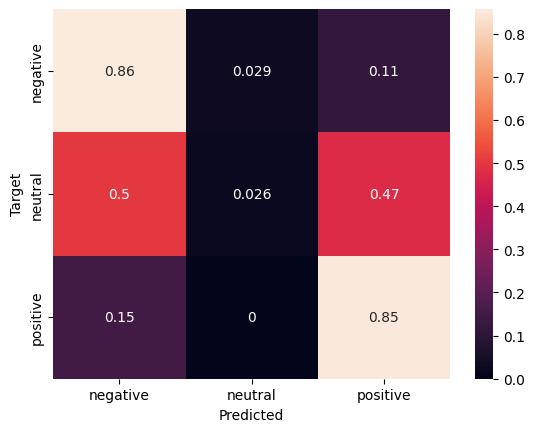

In [29]:
# Scikit-Learn is transitioning to V1, but ut's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    ax = sb.heatmap(df_cm, annot=True, fmt='.2g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

plot_cm(cm)

In [31]:
f1_score(df_['airline_sentiment'], predicted_labels, average='micro')

0.54

In [32]:
roc_auc_score(int_labels, probs, multi_class='ovo')

0.8249559082892416